# Support Vector Machines
## Class Examples

In [9]:
%matplotlib inline
import numpy as np #Our usual preliminary invocation
import matplotlib.pyplot as plt
import matplotlib
import numpy.random as rnd
import os
rnd.seed(42) #To assure replicability
#import seaborn as sns; sns.set() #I have commented this out as I think the seaborn settings are a bit ugly here

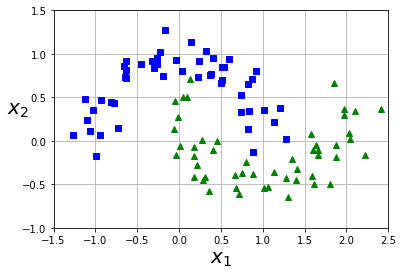

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Now compare a hard margin SVM with a linear boundary to one using the kernel trick, with a polynomial kernel. 

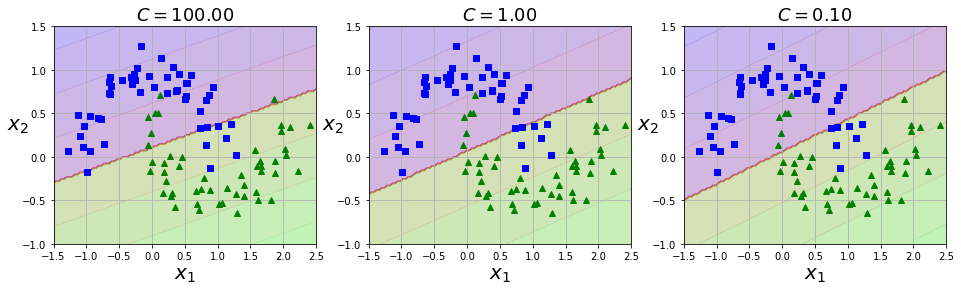

In [15]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC, SVC



def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


lin1_C = 100.
lin2_C = 1.
lin3_C = 0.1

lin1_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=lin1_C, loss="hinge")),
    ))

lin2_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=lin2_C, loss="hinge")),
    ))

lin3_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=lin3_C, loss="hinge")),
    ))

lin1_svm_clf.fit(X, y)
lin2_svm_clf.fit(X, y)
lin3_svm_clf.fit(X, y)

plt.figure(figsize=(16, 4))

plt.subplot(131)
plot_predictions(lin1_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$C={0:.2f}$".format(lin1_C), fontsize=18)

plt.subplot(132)
plot_predictions(lin2_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$C={0:.2f}$".format(lin2_C), fontsize=18)

plt.subplot(133)
plot_predictions(lin3_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$C={0:.2f}$".format(lin3_C), fontsize=18)

plt.show()

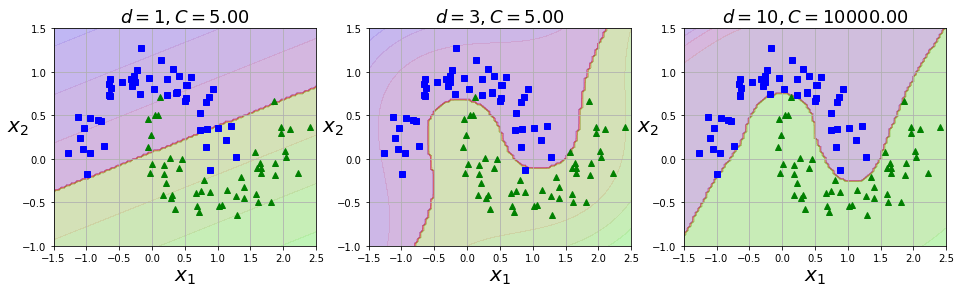

In [20]:
from sklearn.svm import SVC

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

poly1_deg = 1
poly2_deg = 3
poly3_deg = 10

poly1_C = 5
poly2_C = 5
poly3_C = 10000
    
poly1_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=poly1_deg, coef0=1, C=poly1_C))
    ))
poly2_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=poly2_deg, coef0=1, C=poly2_C))
    ))
poly3_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=poly3_deg, coef0=1, C=poly3_C))
    ))

poly1_kernel_svm_clf.fit(X, y)
poly2_kernel_svm_clf.fit(X, y)
poly3_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(16, 4))

plt.subplot(131)
plot_predictions(poly1_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d={0}, C={1:.2f}$".format(poly1_deg, poly1_C), fontsize=18)

plt.subplot(132)
plot_predictions(poly2_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d={0}, C={1:.2f}$".format(poly2_deg, poly2_C), fontsize=18)

plt.subplot(133)
plot_predictions(poly3_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d={0}, C={1:.2f}$".format(poly3_deg, poly3_C), fontsize=18)

plt.show()

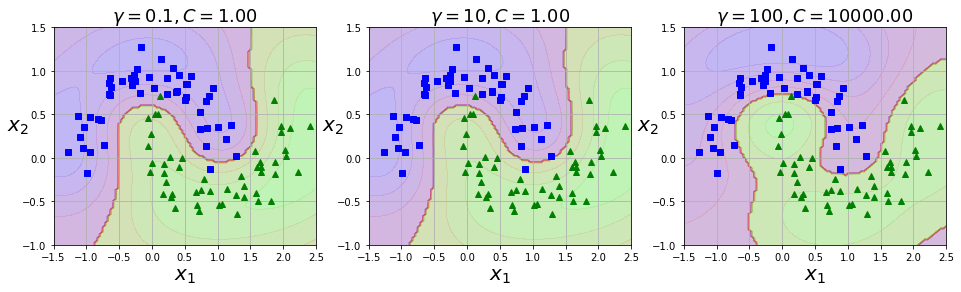

In [28]:
from sklearn.svm import SVC

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

gauss1_gamma = 0.1
gauss2_gamma = 10
gauss3_gamma = 100

gauss1_C = 1
gauss2_C = 1
gauss3_C = 10000
    
gauss1_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", degree=poly1_deg, coef0=1, C=poly1_C))
    ))
gauss2_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", degree=poly2_deg, coef0=1, C=poly2_C))
    ))
gauss3_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", degree=poly3_deg, coef0=1, C=poly3_C))
    ))

gauss1_kernel_svm_clf.fit(X, y)
gauss2_kernel_svm_clf.fit(X, y)
gauss3_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(16, 4))

plt.subplot(131)
plot_predictions(gauss1_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$\gamma={0}, C={1:.2f}$".format(gauss1_gamma, gauss1_C), fontsize=18)

plt.subplot(132)
plot_predictions(gauss2_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$\gamma={0}, C={1:.2f}$".format(gauss2_gamma, gauss2_C), fontsize=18)

plt.subplot(133)
plot_predictions(gauss3_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$\gamma={0}, C={1:.2f}$".format(gauss3_gamma, gauss3_C), fontsize=18)

plt.show()